#COVID-19  


---


A **COVID-19** é uma doença respiratória causada pelo vírus **SARS-CoV-2** e apresenta como principais sintomas febre, tosse seca e dificuldade respiratória. Essa doença pode iniciar como um simples resfriado, mas pode se agravar e levar à morte. Os primeiros casos surgiram na China, no final de 2019. Em seguida, espalhou-se para diversos outros países, o que levou a Organização Mundial de Saúde a decretar, no dia 11 de março de 2020, estado de pandemia.

Essa doença é transmitida, principalmente, de uma pessoa para outra por meio das gotículas respiratórias. Além disso, ao tossir ou espirrar, o doente pode contaminar objetos. Uma pessoa pode infectar-se ao tocar objetos contaminados e levar a mão à boca, nariz e olhos sem antes higienizá-la. Dentre as medidas para prevenir o contágio e evitar a disseminação da doença, podemos citar a importância de se higienizar a mão frequentemente com água e sabão ou álcool em gel 70%, além de evitar aglomerações.

#Configuração
É configurado o diretorio do dataset e realiza os import das bibiotecas que iremos trabalhar ate o final desse notebook

O dataSet original pode ser obtido no [Kaggle](https://www.kaggle.com/c/covid19-global-forecasting-week-2/data)

```
# Tipos 
Regressão Linear
Classificadores - KNN
Classificadores - Bayes e Arv.Decisão
Associação - Apriori
Clusters - KMeans
Redes Neurais
```

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Bibliotecas Utilizadas

**Pandas**
> is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series

In [0]:
import pandas as pd

**Seaborn**
> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

In [0]:
import seaborn as sns

**Numpy**
> is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

In [0]:
import numpy as np

**Sklearn**
>Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.*It* features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cluster import KMeans

**TensorFlow**
>TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.It is used for both research and production at Google

---



**Keras**
> keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible

In [0]:
import tensorflow 
from tensorflow import  keras
from datetime import datetime
import statsmodels.api as sm

#Regressão Linear - OK

In [0]:
treino =pd.read_csv('/content/drive/My Drive/Proj/trabalho/treino.csv')
teste =pd.read_csv('/content/drive/My Drive/Proj/trabalho/teste.csv')
treino.head(5)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


Iremos transformar nosso modelo apenas para nivel Brasil

In [0]:
treino_br=treino.loc[treino['Country_Region'] == 'Brazil'].copy()
teste_br=teste.loc[teste['Country_Region'] == 'Brazil'].copy()
treino_br['Date'] = pd.to_datetime(treino_br['Date'])
teste_br['Date'] = pd.to_datetime(teste_br['Date'])
treino_br.tail(3)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
2007,2965,NaN,Brazil,2020-03-26,2985.0,77.0
2008,2966,NaN,Brazil,2020-03-27,3417.0,92.0
2009,2967,NaN,Brazil,2020-03-28,3904.0,111.0


Estou utilizando  a variavel "ConfirmedCases" para treinar para o numero de fatalidades

In [0]:
reglin = LinearRegression ()
reglin.fit(treino_br[['ConfirmedCases']], treino_br ['Fatalities'])
print(reglin.coef_ ,  reglin.intercept_)

[0.02490991] -1.23083329561977


Irei Criar um novo dataFrame com uma quantidade mais alta de casos confirmados, sendo assim auxiliaria a medição e a correlação entre as variaveis acompanhando o crescimento da fatalidade

In [0]:
fatalidades = pd.DataFrame ({
    'ConfirmedCases' : [4000,10000,50000],
})
predict = reglin.predict(fatalidades)
predict

array([  98.40881787,  247.86829461, 1244.26480622])

In [0]:
r2 =  reglin.score(treino_br[['ConfirmedCases']],treino_br['Fatalities'])
r2

Obtenho o coeficiente de determinação **(R2²)**  

In [0]:
fat_prev = reglin.predict( treino_br[['ConfirmedCases']])
rr = metrics.r2_score(treino_br['Fatalities'], fat_prev)
rr 

0.9653390109110631

In [0]:
err_quad =  metrics.mean_squared_error (treino_br['Fatalities'], fat_prev)
err_quad

16.06055420197888

Perda de regressão ao erro quadrático médio

In [0]:
err = np.sqrt(err_quad)
err

4.0075621270267145

In [0]:
consolid = sm.add_constant(treino_br[['ConfirmedCases']])

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
rl = sm.OLS(treino_br['Fatalities'], consolid).fit()
rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Fatalities   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1810.
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.52e-49
Time:                        12:08:47   Log-Likelihood:                -188.08
No. Observations:                  67   AIC:                             380.2
Df Residuals:                      65   BIC:                             384.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2308      0.535     -2.301      0.025      -2.299      -0.163
ConfirmedCases     0.0249      0.001     42.548      0.000       0.024       0.026
==============================================================================
Omnibus:                       18.275   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.092
Skew:                          -0.640   Prob(JB):                     4.01e-13
Kurtosis:                       7.338   Cond. No.                         983.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Iremos gerar um sumario contendo algumas  informações como R², Variavel utilizada, numero de observações e residuo.

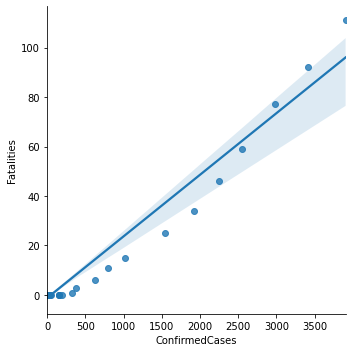

In [0]:
sns.lmplot('ConfirmedCases', 'Fatalities', data= treino_br)

AO analizar vemos os dados se aproximando da reta depois superando  e saindo do nivel considerado.

In [351]:
treino_br.corr()

,Id,ConfirmedCases,Fatalities
Id,1.000000,0.600874,0.524355
ConfirmedCases,0.600874,1.000000,0.982517
Fatalities,0.524355,0.982517,1.000000


Podemos ver que as variaveis são fortemente correlacionadas

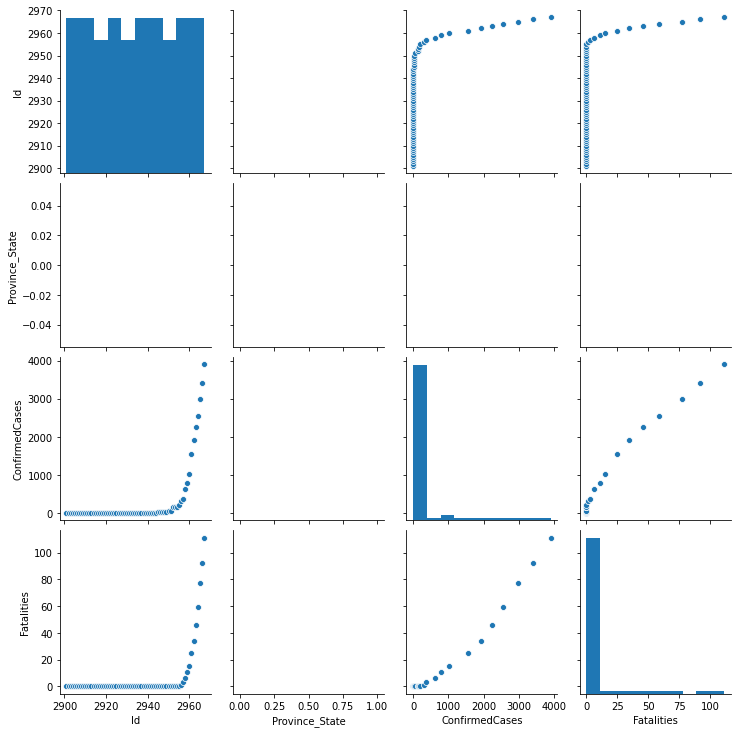

In [352]:
sns.pairplot(treino_br)

#KNN - OK


In [289]:
from sklearn.neighbors import KNeighborsClassifier
series = read_csv('/content/drive/My Drive/Proj/trabalho/treino.csv')
base= series[series['Country_Region'] == 'Italy'].copy()
treino= base
teste= base
teste=teste.drop(columns=['Fatalities'],axis=1)
treino.head(5)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
9380,14001,NaN,Italy,2020-01-22,0.0,0.0
9381,14002,NaN,Italy,2020-01-23,0.0,0.0
9382,14003,NaN,Italy,2020-01-24,0.0,0.0
9383,14004,NaN,Italy,2020-01-25,0.0,0.0
9384,14005,NaN,Italy,2020-01-26,0.0,0.0


Realizado a importação da Base da Italia, utilizei a mema base de treino e teste para poder fazer uma medição aproximada de utilizando a variavel ConfirmedCases iria apresentar uma taxa interessante 

In [290]:
kviz = KNeighborsClassifier(n_neighbors=2)
kviz.fit(treino[['ConfirmedCases']],treino['Fatalities'] )
previsao = kviz.predict(teste[['ConfirmedCases']])
print('Previsão: ')
print(previsao)

Previsão: 
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 3.000e+00 3.000e+00 7.000e+00
 1.000e+01 1.200e+01 1.700e+01 2.100e+01 3.400e+01 3.400e+01 5.200e+01
 7.900e+01 1.070e+02 1.480e+02 1.970e+02 2.330e+02 4.630e+02 4.630e+02
 8.270e+02 8.270e+02 1.266e+03 1.266e+03 1.809e+03 1.809e+03 2.158e+03
 2.503e+03 2.978e+03 3.405e+03 4.825e+03 5.476e+03 5.476e+03 6.820e+03
 6.820e+03 8.215e+03 8.215e+03 9.134e+03]


Criando uma função simples de acuracia, depois verificarei se existe maneira automatica de realizar essa apuração

In [0]:
def acuracia(a,b):
    x = (b * 100)/a    
    if x > 0: 
      return x 
    else: 
      return 0.0

Irei um  array para trabalhar e calcular a porcentagem de acerto exato e total para a base de teste. Futuramente daria para retreinar o modelo e gerar uma base sample e verificar a sua acertividades. Mas devido a analise realizados pela microsoft e por outras empresas de analises, esta muito dificil apenas isolar os dados de covid ja que ainda muitas pessoas acabam morrendo em suas casas e esses dados pode mexer na curva do dia nao deixando o modelo refinado.

In [348]:
arr = treino.to_numpy()
cur_total = 0
qtd_dia = 0
for t in range(len(treino)):
  
  previsto = previsao[t]
  esperado = arr[t][5] 
  acur = acuracia(esperado,previsto)
  if esperado >  0 :
    qtd_dia= qtd_dia + 1
    cur_total = cur_total + acur 
    print('Previsto=%.2f, esperado=%.2f  , Accuracia=%.2f' % (previsto, esperado, acur))
  

Previsto=0.00, esperado=1.00  , Accuracia=0.00
Previsto=1.00, esperado=2.00  , Accuracia=50.00
Previsto=3.00, esperado=3.00  , Accuracia=100.00
Previsto=3.00, esperado=7.00  , Accuracia=42.86
Previsto=7.00, esperado=10.00  , Accuracia=70.00
Previsto=10.00, esperado=12.00  , Accuracia=83.33
Previsto=12.00, esperado=17.00  , Accuracia=70.59
Previsto=17.00, esperado=21.00  , Accuracia=80.95
Previsto=21.00, esperado=29.00  , Accuracia=72.41
Previsto=34.00, esperado=34.00  , Accuracia=100.00
Previsto=34.00, esperado=52.00  , Accuracia=65.38
Previsto=52.00, esperado=79.00  , Accuracia=65.82
Previsto=79.00, esperado=107.00  , Accuracia=73.83
Previsto=107.00, esperado=148.00  , Accuracia=72.30
Previsto=148.00, esperado=197.00  , Accuracia=75.13
Previsto=197.00, esperado=233.00  , Accuracia=84.55
Previsto=233.00, esperado=366.00  , Accuracia=63.66
Previsto=463.00, esperado=463.00  , Accuracia=100.00
Previsto=463.00, esperado=631.00  , Accuracia=73.38
Previsto=827.00, esperado=827.00  , Accuraci

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [350]:
print('A acuracia total cosiderando todos os dias com dados %.2f' % (cur_total/qtd_dia) + '%')

A acuracia total cosiderando todos os dias com dados 81.63%


In [349]:
print(acuracia(37,11))

29.72972972972973


##Analise
Acuracia com 100% de acerto =  29.72% </br>
Acuracia total cosiderando todos os dias com dados 81.63%
>  Precision = True Positives / (True Positives + False Positives) = **81.63%** </br>
   Recall = True Positives / (True Positives + False Negatives) =  **29.72%** 

#ARIMA (autoregressive integrated moving average) - OK


            ConfirmedCases  Fatalities
Date                                  
2020-03-26          2985.0        77.0
2020-03-27          3417.0        92.0
2020-03-28          3904.0       111.0


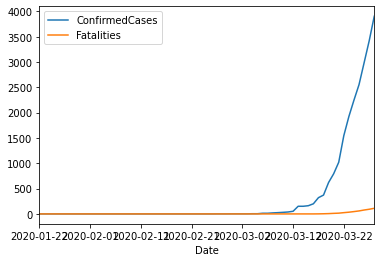

In [362]:
from matplotlib import pyplot
                           
series = read_csv('/content/drive/My Drive/Proj/trabalho/treino.csv', header=0, index_col=3, squeeze=True)
series = series[series['Country_Region'] == 'Brazil']
series = series.drop(columns=['Id','Province_State','Country_Region'], axis=1)
print(series.tail(3))
series.plot()
pyplot.show()

Devido a grande volumes com dados zerados estava alterando o grafico e o modelo. Assim removi o periodo zerado para não afetar a base teste e treino no final do modelo

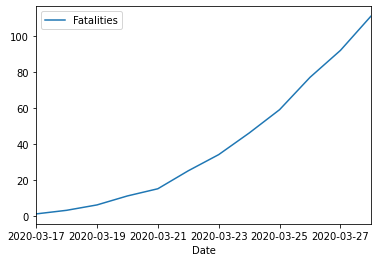

In [363]:
series = series['2020-03-17':'2020-03-28']
series = series.drop(columns=['ConfirmedCases'],axis=1)
series.plot()
pyplot.show()

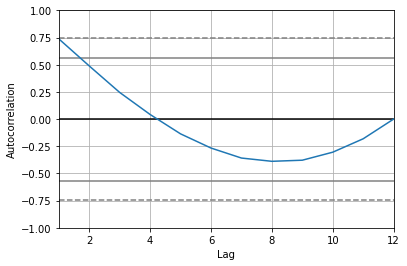

In [364]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.Fatalities   No. Observations:                   11
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -49.378
Method:                       css-mle   S.D. of innovations     1585872024.059
Date:                Tue, 31 Mar 2020   AIC                            108.755
Time:                        20:28:31   BIC                            110.745
Sample:                    03-18-2020   HQIC                           107.501
                         - 03-28-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 45.0875        nan        nan        nan         nan         nan
ar.L1.D.Fatalities    -0.0694        nan        nan        nan         nan         nan
ar.L2.D.Fatalities  

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountere

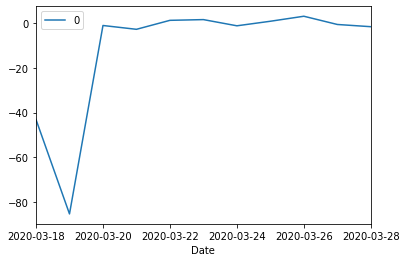

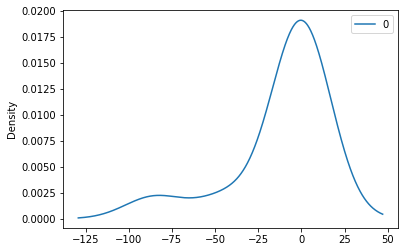

               0
count  11.000000
mean  -11.762832
std    27.598231
min   -85.175042
25%    -2.248250
50%    -1.128585
75%     0.969055
max     2.998014


In [365]:
from statsmodels.tsa.arima_model import ARIMA
s_arima = series
# fit model
model = ARIMA(s_arima, order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Claramente nao temos dados bons o suficiente a nivel brasil, para utilizar a variavel de fatalidades geram apenas 11 registros.

In [0]:
from sklearn.metrics import mean_squared_error
X = s_arima.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

 **Forecast** criar previsões observando uma série histórica de dados conhecido como dados de séries temporais.
 </br>
 Uma série temporal nada mais é do que uma série de observações registradas sequencialmente no decorrer do tempo


predicted=40.922003, expected=46.000000
predicted=46.836140, expected=59.000000
predicted=52.395393, expected=77.000000
predicted=57.852826, expected=92.000000
predicted=63.285830, expected=111.000000
Test MSE: 844.361


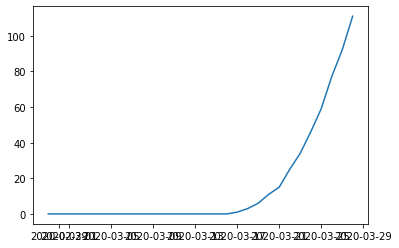

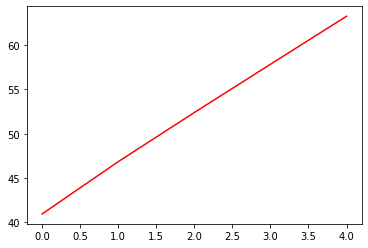

In [358]:
#baseReferencia
series = read_csv('/content/drive/My Drive/Proj/trabalho/treino.csv')
series = series[series['Country_Region'] == 'Brazil']
series = series[series['Date'] >= "2020-02-28"]
series = series.drop(columns=['Id','Province_State','Country_Region'],axis=1)

history = [x for x in train]
predictions = list()
for t in range(len(test)):
  model = ARIMA(history, order=(2,1,0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  yhat = output[0]
  obs = test[t]
  predictions.append(yhat)
  history.append(yhat)
  print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(pd.to_datetime(series['Date']),series['Fatalities'])
pyplot.show()
pyplot.plot(predictions, color='red')

utilizando esse modelo preditivo a acuracia do modelo ficou muito abaixo não consguindo nenhuma predição 100%, precisaria rever o modelo e os dados para conseguir utilizar mais variaveis  de correlação para só assim conseguir corrigir essa curva.

#Series Temporais  (não Concluido)

In [0]:
baseBr=treino[treino['Country_Region'] == 'Brazil'].copy()
#baseBr= baseBr[baseBr['Date'] > "2020-03-15"].copy()
baseBr['Date'] = pd.to_datetime(baseBr['Date'])

##Validação

In [0]:
treino_brasil = baseBr[baseBr['Date'] <  "2020-03-19"]
valid_brasil= baseBr[baseBr['Date'] >=  "2020-03-19"]
#baseBr.tail()
treino_brasil.shape,valid_brasil.shape

((57, 6), (10, 6))

##Baseline

In [0]:
y_treino = treino_brasil['ConfirmedCases']
y_valid = valid_brasil['ConfirmedCases']

baseline_treino = treino_brasil.groupby(['Country_Region'])['ConfirmedCases'].shift(1)
baseline_valid = valid_brasil.groupby(['Country_Region'])['ConfirmedCases'].shift(1)

In [0]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_valid[baseline_valid.notnull()], 
                               baseline_valid[baseline_valid.notnull()]))

0.22204161342475348

In [0]:
0.22204161342475348 * 100

22.20416134247535

##Machine Learning

In [0]:
df_X_treino = pd.DataFrame(index=treino_brasil.index)
df_X_valid = pd.DataFrame(index=valid_brasil.index)

##Target

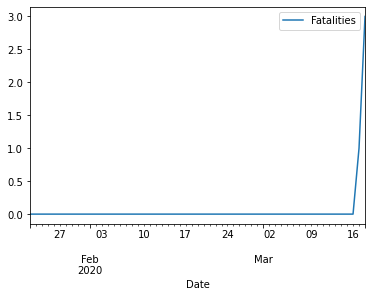

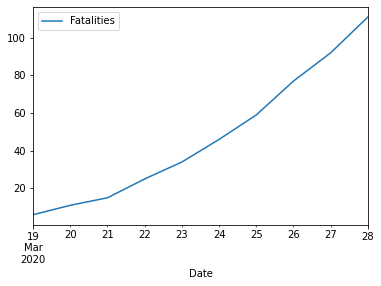

In [0]:
treino_brasil.plot(x='Date', y='Fatalities')
valid_brasil.plot(x='Date', y='Fatalities')